In [ ]:
#사용 데이터 -> https://dacon.io/competitions/official/235949/overview/description

#필요한 라이브러리 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#팔당댐 및 한강 주요 지점 수위 및 유량
data_2012 = pd.read_csv("data_2012.csv")
data_2013 = pd.read_csv("data_2013.csv")
data_2014 = pd.read_csv("data_2014.csv")
data_2015 = pd.read_csv("data_2015.csv")
data_2016 = pd.read_csv("data_2016.csv")
data_2017 = pd.read_csv("data_2017.csv")
data_2018 = pd.read_csv("data_2018.csv")
data_2019 = pd.read_csv("data_2019.csv")
data_2020 = pd.read_csv("data_2020.csv")
data_2021 = pd.read_csv("data_2021.csv")
data_2022 = pd.read_csv("data_2022.csv")

In [ ]:
#한강 주요 지점 강수량
rf_2012 = pd.read_csv("rf_2012.csv")
rf_2013 = pd.read_csv("rf_2013.csv")
rf_2014 = pd.read_csv("rf_2014.csv")
rf_2015 = pd.read_csv("rf_2015.csv")
rf_2016 = pd.read_csv("rf_2016.csv")
rf_2017 = pd.read_csv("rf_2017.csv")
rf_2018 = pd.read_csv("rf_2018.csv")
rf_2019 = pd.read_csv("rf_2019.csv")
rf_2020 = pd.read_csv("rf_2020.csv")
rf_2021 = pd.read_csv("rf_2021.csv")
rf_2022 = pd.read_csv("rf_2022.csv")

In [ ]:
data_2012_1 = pd.merge(data_2012, rf_2012, on = 'ymdhm')
data_2013_1 = pd.merge(data_2013, rf_2013, on = 'ymdhm')
data_2014_1 = pd.merge(data_2014, rf_2014, on = 'ymdhm')
data_2015_1 = pd.merge(data_2015, rf_2015, on = 'ymdhm')
data_2016_1 = pd.merge(data_2016, rf_2016, on = 'ymdhm')
data_2017_1 = pd.merge(data_2017, rf_2017, on = 'ymdhm')
data_2018_1 = pd.merge(data_2018, rf_2018, on = 'ymdhm')
data_2019_1 = pd.merge(data_2019, rf_2019, on = 'ymdhm')
data_2020_1 = pd.merge(data_2020, rf_2020, on = 'ymdhm')
data_2021_1 = pd.merge(data_2021, rf_2021, on = 'ymdhm')
data_2022_1 = pd.merge(data_2022, rf_2022, on = 'ymdhm')

In [ ]:
#2012~2022 데이터를 하나로 합침
df = pd.concat([data_2012_1, data_2013_1, data_2014_1, data_2015_1, data_2016_1, data_2017_1, data_2018_1, data_2019_1, data_2020_1, data_2021_1, data_2022_1])

In [ ]:
df.shape

(276336, 18)

# 데이터 전처리

In [ ]:
df.isnull().sum()

ymdhm               0
swl               743
inf               743
sfw               743
ecpc              743
tototf            743
tide_level       4927
wl_1018662         59
fw_1018662      16380
wl_1018680         59
fw_1018680     196849
wl_1018683         59
fw_1018683       1279
wl_1019630         59
fw_1019630         59
rf_10184100         0
rf_10184110         0
rf_10184140         0
dtype: int64

In [ ]:
# 그 외에도 값을 알 수 없거나 0으로 되어 있는 값들은 외부 데이터로 예측을 하는 대신에 제거를 하는 방법을 선택
null_index_ = list()

for i in range(len(df[df['fw_1018662'].isnull() == True].index)):
    null_index_.append(df[df['fw_1018662'].isnull() == True].index[i])

df.drop(index = null_index_, axis = 0, inplace = True)

null_index_2 = list()

for i in range(len(df[df['wl_1018662']==0].index)):
    null_index_2.append(df[df['wl_1018662']==0].index[i])

df.drop(index = null_index_2, axis = 0, inplace = True)

null_index_3 = list()
for i in range(len(df[df['wl_1018680']==0].index)):
    null_index_3.append(df[df['wl_1018680']==0].index[i])

df.drop(index = null_index_3, axis = 0, inplace = True)

null_index_5 = list()
for i in range(len(df[df['wl_1018683']==0].index)):
    null_index_5.append(df[df['wl_1018683']==0].index[i])

df.drop(index = null_index_5, axis = 0, inplace = True)

null_index_6 = list()
for i in range(len(df[df['fw_1018683'].isnull() == True].index)):
    null_index_6.append(df[df['fw_1018683'].isnull() == True].index[i])

df.drop(index = null_index_6, axis = 0, inplace = True)

null_index_7 = list()
for i in range(len(df[df['wl_1019630']==0].index)):
    null_index_7.append(df[df['wl_1019630']==0].index[i])

df.drop(index = null_index_7, axis = 0, inplace = True)

null_index_8 = list()
for i in range(len(df[df['fw_1019630'].isnull() == True].index)):
    null_index_8.append(df[df['fw_1019630'].isnull() == True].index[i])

df.drop(index = null_index_8, axis = 0, inplace = True)

In [ ]:
df.isnull().sum()

ymdhm              0
swl              153
inf              153
sfw              153
ecpc             153
tototf           153
tide_level      1425
wl_1018662         0
fw_1018662         0
wl_1018680         0
fw_1018680     64839
wl_1018683         0
fw_1018683         0
wl_1019630         0
fw_1019630         0
rf_10184100        0
rf_10184110        0
rf_10184140        0
dtype: int64

In [ ]:
tide_index = list()

for i in range(len(df[df['tide_level'].isnull() == True].index)):
    tide_index.append(df[df['tide_level'].isnull() == True].index[i])
df.drop(index = tide_index, axis = 0, inplace = True)

null_index = list()

for i in range(len(df[df['swl'].isnull() == True].index)):
    null_index.append(df[df['swl'].isnull() == True].index[i])

df.drop(index = null_index, axis = 0, inplace = True)

In [ ]:
df.isnull().sum()

ymdhm              0
swl                0
inf                0
sfw                0
ecpc               0
tototf             0
tide_level         0
wl_1018662         0
fw_1018662         0
wl_1018680         0
fw_1018680     53861
wl_1018683         0
fw_1018683         0
wl_1019630         0
fw_1019630         0
rf_10184100        0
rf_10184110        0
rf_10184140        0
dtype: int64

In [ ]:
df.drop(['fw_1018680'], axis = 1, inplace = True)

In [ ]:
df

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,2022-05-31 21:30,25.200,140.72,218.73,25.27,140.72,352.0,290.7,337.64,283.2,282.0,-549.72,271.3,493.58,0.0,0.0,0.0
4450,2022-05-31 21:40,25.200,140.99,218.73,25.27,140.99,337.0,297.7,381.12,284.2,283.0,-558.84,268.3,460.03,0.0,0.0,0.0
4451,2022-05-31 21:50,25.200,140.97,218.73,25.27,140.97,324.0,300.7,400.58,290.2,283.0,-508.79,264.3,417.17,0.0,0.0,0.0
4452,2022-05-31 22:00,25.210,757.85,219.10,24.90,141.19,310.0,302.7,413.83,294.2,286.0,-234.54,260.3,376.45,0.0,0.0,0.0


In [ ]:
# 예측하고자 하는 column은 'wl_1018662'

new_index = [x for x in range(len(df['swl']))]
df.index = new_index

#train 데이터는 80%로 사용 -> 날짜 순으로 80% 선택
class_index = int(len(df['swl']) * 0.8)

In [ ]:
standard = df['ymdhm'][class_index].split(" ")[0]
train = df[df['ymdhm'] < standard]
test = df[df['ymdhm'] >= standard]

In [ ]:
X_train = train[train.columns.difference(['ymdhm', 'wl_11018662'])]
X_test = test[test.columns.difference(['ymdhm', 'wl_11018662'])]
Y_train = train['wl_1018662']
Y_test = test['wl_1018662']

Y_train = Y_train.shift(-1)
last = len(Y_train) - 1
del Y_train[last]
X_train.drop(index = last, axis = 0, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


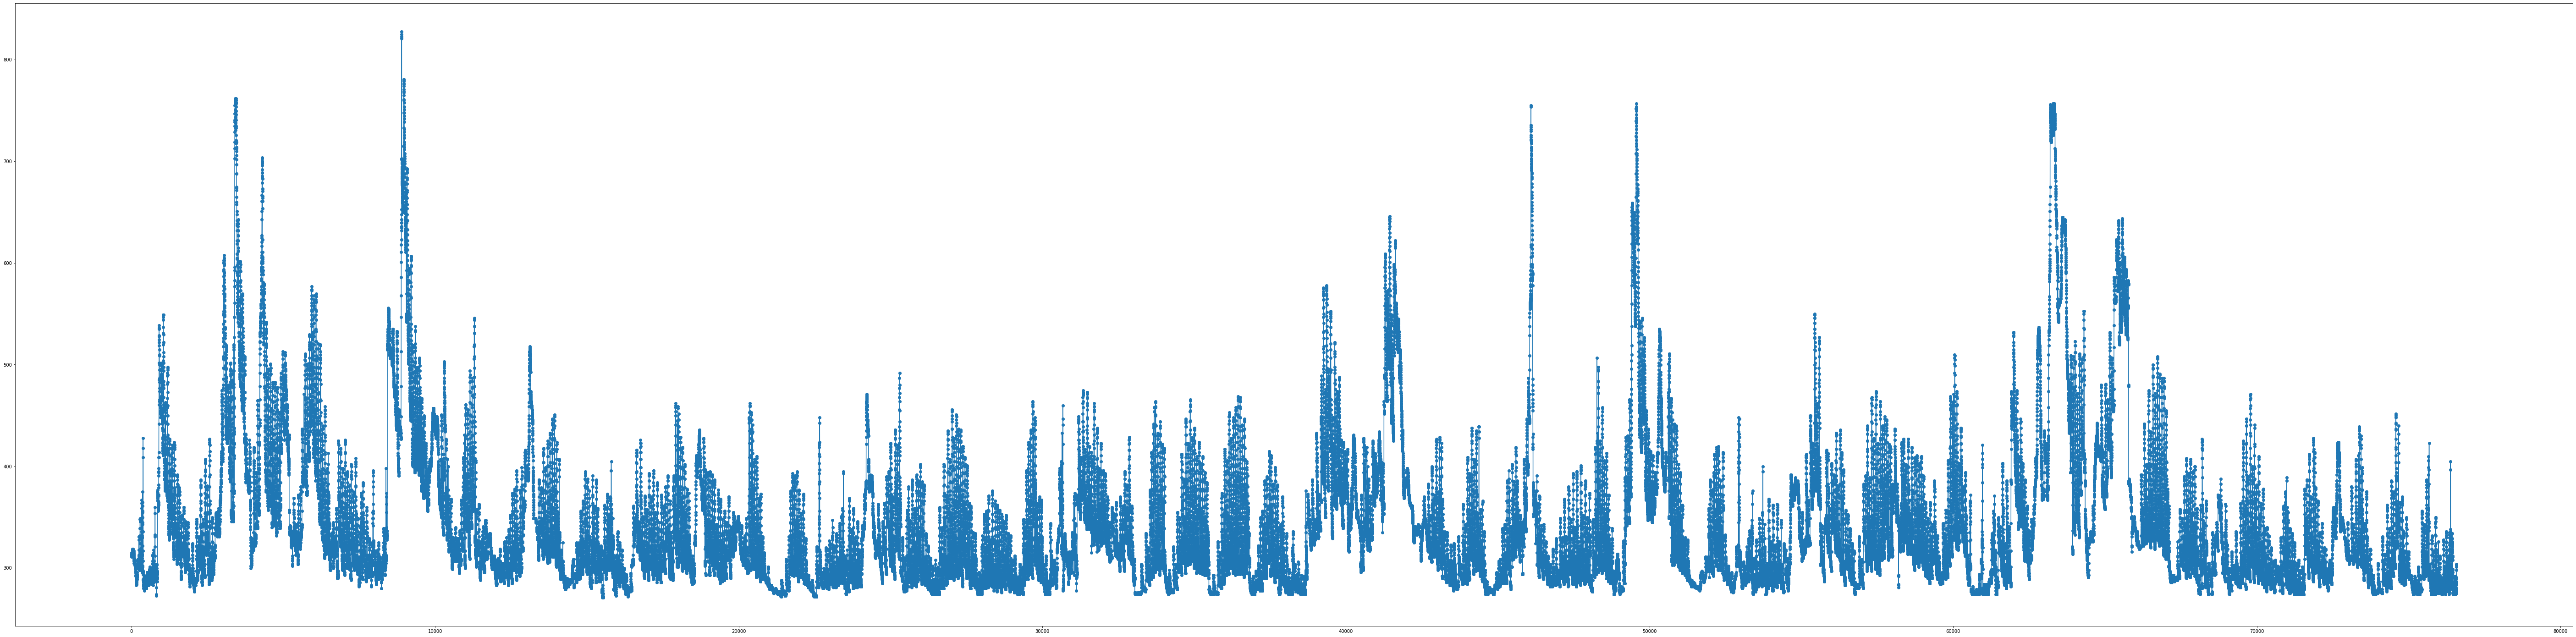

In [ ]:
#전체 시계열 시각화
df_y = df['wl_1018662']
fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(100,25)
ax1.plot(df_y, marker = "o")

# 라쏘 회귀 사용

In [ ]:
from sklearn.linear_model import Lasso

lasso_low = Lasso(alpha=0.03, max_iter=100000).fit(X_train, Y_train)
print("사용한 인자의 수 : {}".format(np.sum(lasso_low.coef_ != 0)))
lasso_low.fit(X_train, Y_train)
X_test_result = lasso_low.predict(X_test)
print(X_test_result)

사용한 인자의 수 : 15
[288.56906314 288.45288451 287.53526831 ... 304.02329219 305.1248136
 303.59331913]


In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, Y_train)
X_test_result = lasso_reg.predict(X_test)
X_test_result

array([288.65510566, 288.53784829, 287.62481527, ..., 304.05044265,
       305.14944496, 303.63019584])

In [ ]:
# R2와 RMSE 값을 계산하기 위해 모두 list 형태로 맞춰준다.
X_test_ = list()
Y_test_ = list()
for i in  range(len(X_test)):
    X_test_.append(X_test_result[i])
for i in range(len(Y_test.index)):
    Y_test_.append(Y_test[Y_test.index[i]])


In [ ]:
# Lasso 회귀 모형에 대한 점수 추출 (R squared)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
R2_Lasso = r2_score(X_test_, Y_test_)
RMSE_Lasso =  mean_squared_error(X_test_, Y_test_) ** 0.5
print("Lasso 회귀 모형에 따른 R2 값: {}".format(R2_Lasso))
print("Lasso 회귀 모형에 따른 RMSE 값: {}".format(RMSE_Lasso))

Lasso 회귀 모형에 따른 R2 값: 0.9981251932277143
Lasso 회귀 모형에 따른 RMSE 값: 3.8763697882348933


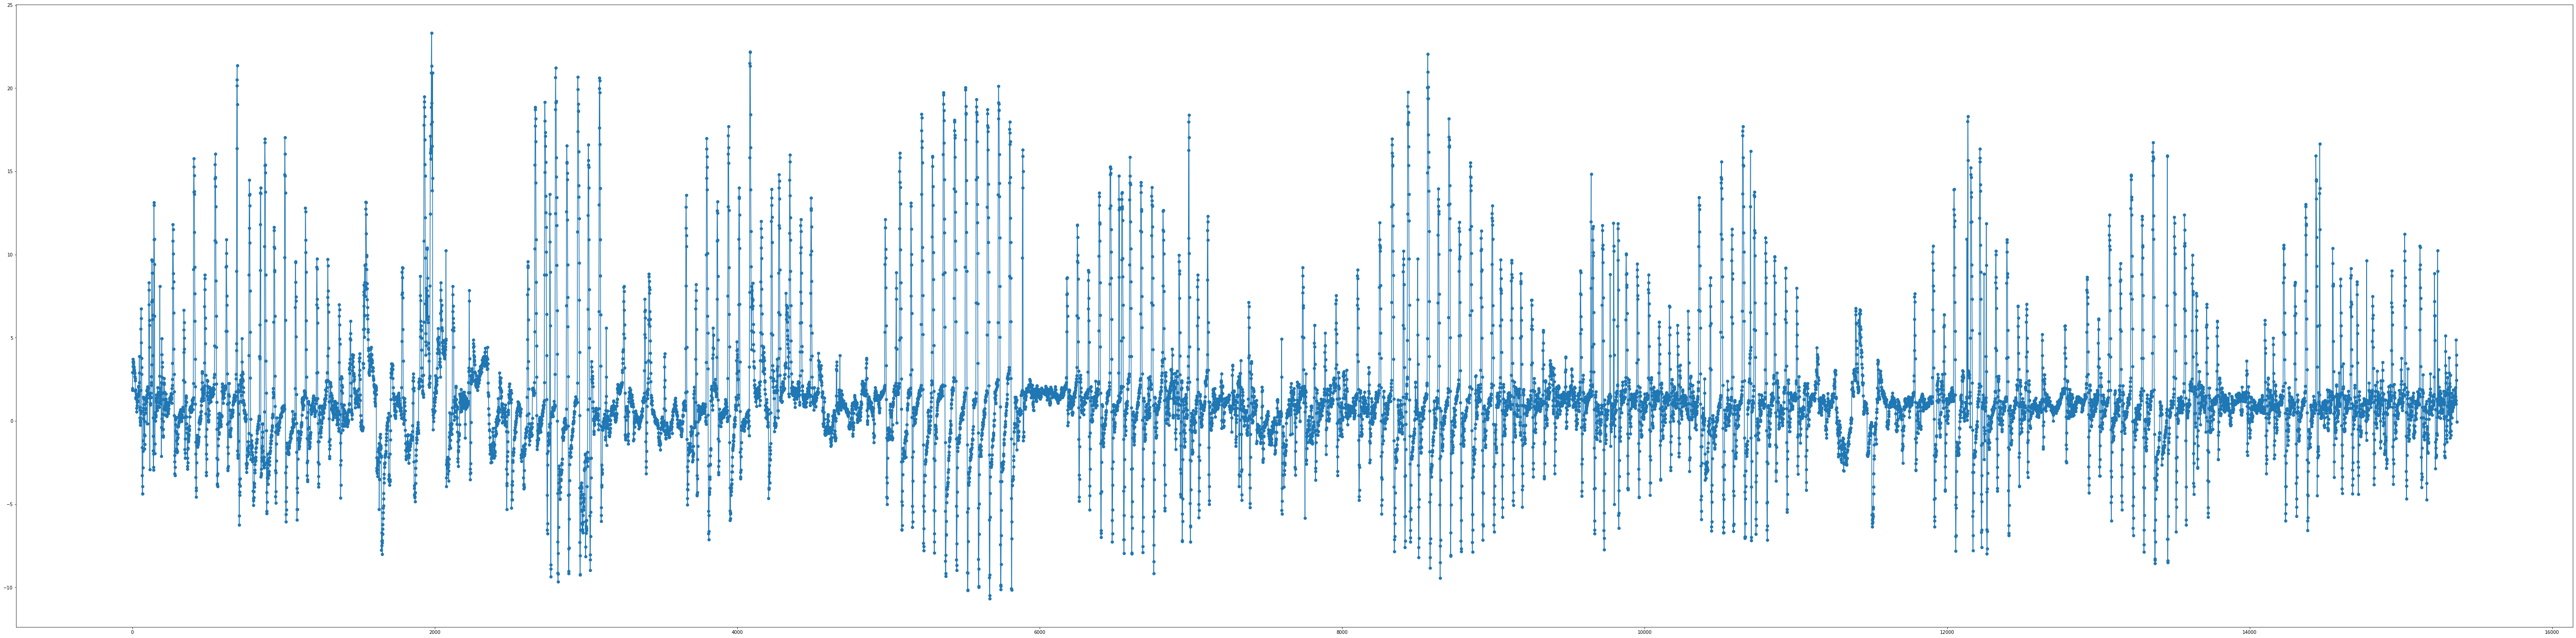

In [ ]:
# 관측치와 예측치의 차이(잔차)를 나타내는 플롯을 기르기 위한 list 만들기
Lasso_error_1 = list()
for i in range(len(X_test)):
    Lasso_error_1.append(X_test_[i] - Y_test_[i])


# 본 데이터는 시계열 데이터이므로 qq plot이 아닌 단순히 잔차를 plot으로 시각화
fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(100,25)
ax1.plot(Lasso_error_1, marker = "o")

print("잔차의 최대는 {}, 최소는 {}, 평균은 {}이다.".format(max(Lasso_error_1), min(Lasso_error_1), np.sum(Lasso_error_1)/len(Lasso_error_1)))

In [ ]:
df_corr = df.corr()

In [ ]:
df_corr

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
swl,1.000000,-0.307299,0.758016,-0.758012,-0.317448,-0.028559,-0.285888,-0.275527,-0.317662,-0.309038,-0.294858,-0.264679,-0.255463,-0.095719,-0.092916,-0.086170
inf,-0.307299,1.000000,-0.147199,0.147198,0.984208,0.049822,0.852917,0.871367,0.825918,0.813851,0.837125,0.755934,0.784001,0.092044,0.108050,0.099120
sfw,0.758016,-0.147199,1.000000,-1.000000,-0.150697,-0.011312,-0.134012,-0.137677,-0.166499,-0.168274,-0.134816,-0.134898,-0.132722,-0.043081,-0.051513,-0.034564
ecpc,-0.758012,0.147198,-1.000000,1.000000,0.150696,0.011309,0.134012,0.137679,0.166500,0.168274,0.134816,0.134899,0.132723,0.043082,0.051513,0.034564
tototf,-0.317448,0.984208,-0.150697,0.150696,1.000000,0.051080,0.858748,0.875642,0.830670,0.818648,0.843545,0.760673,0.787275,0.093150,0.109063,0.101970
tide_level,-0.028559,0.049822,-0.011312,0.011309,0.051080,1.000000,-0.007473,0.018274,-0.001250,0.003674,-0.113714,0.073247,0.089684,0.019814,0.006401,0.007674
wl_1018662,-0.285888,0.852917,-0.134012,0.134012,0.858748,-0.007473,1.000000,0.961583,0.989339,0.989320,0.765114,0.940163,0.927905,0.082764,0.097010,0.092995
fw_1018662,-0.275527,0.871367,-0.137677,0.137679,0.875642,0.018274,0.961583,1.000000,0.945773,0.941249,0.797792,0.884133,0.936003,0.079197,0.099069,0.093260
wl_1018680,-0.317662,0.825918,-0.166499,0.166500,0.830670,-0.001250,0.989339,0.945773,1.000000,0.994896,0.725624,0.951989,0.934879,0.081015,0.093608,0.089198
wl_1018683,-0.309038,0.813851,-0.168274,0.168274,0.818648,0.003674,0.989320,0.941249,0.994896,1.000000,0.704839,0.967067,0.945395,0.080381,0.092541,0.089304


In [ ]:
X_train

,ecpc,fw_1018662,fw_1018683,fw_1019630,inf,rf_10184100,rf_10184110,rf_10184140,sfw,swl,tide_level,tototf,wl_1018662,wl_1018680,wl_1018683,wl_1019630
0,24.93,469.05,729.80,540.18,555.0,0.0,0.0,0.0,219.07,24.800,445.0,555.0,310.7,300.2,290.0,275.3
1,25.15,498.00,731.48,540.18,464.6,0.0,0.0,0.0,218.86,24.794,449.0,562.9,314.7,300.2,290.0,275.3
2,25.31,490.68,726.42,540.18,478.1,0.0,0.0,0.0,218.69,24.789,451.0,576.4,313.7,301.2,290.0,275.3
3,25.31,476.21,726.42,552.17,464.8,0.0,0.0,0.0,218.69,24.789,452.0,563.1,311.7,301.2,290.0,276.3
4,25.31,476.21,707.17,564.29,478.1,0.0,0.0,0.0,218.69,24.789,450.0,576.4,311.7,301.2,291.0,277.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61201,34.76,319.84,323.87,471.08,245.0,0.0,0.0,0.0,209.24,24.940,171.0,345.0,287.7,293.2,280.0,269.3
61202,34.76,319.84,319.72,471.08,145.0,0.0,0.0,0.0,209.24,24.940,184.0,345.0,287.7,293.2,280.0,269.3
61203,34.76,319.84,278.20,460.03,245.0,0.0,0.0,0.0,209.24,24.940,198.0,345.0,287.7,293.2,280.0,268.3
61204,35.12,308.24,303.11,460.03,139.0,0.0,0.0,0.0,208.88,24.930,212.0,339.0,285.7,293.2,280.0,268.3


In [ ]:
#효과적인 X들을 VIF 방법을 통해 추출하기
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()

#i번째 x들을 다른 x들로 회귀분석
#높을수록 선형결합으로 표현 될수 있으며 이는 종속성이 있는 변수이다.
vif['VIF_Factor']= [variance_inflation_factor(X_train.values , i) for i in range(X_train.shape[1])]

vif['Feature'] = X_train.columns
vif.sort_values(by='VIF_Factor', ascending=True)
# 이 데이터의 경우 서로에게 영향을 받는 변수들로 구성이 되어 있으므로 VIF가 높게 나올수 밖에 없다.

,VIF_Factor,Feature
5,1.460989,rf_10184100
6,1.471493,rf_10184110
7,1.557350,rf_10184140
10,5.912427,tide_level
2,6.031032,fw_1018683
4,44.034991,inf
11,47.504082,tototf
1,107.805446,fw_1018662
3,121.548849,fw_1019630
0,592.422534,ecpc


#릿지 회귀 사용

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge().fit(X_train, Y_train)
y_pred = ridge.predict(X_test)

# Ridge_score_train_1 = ridge.score(X_train, Y_train)
# Ridge_score_test_1 = ridge.score(y_pred, Y_test)
# print(Ridge_score_train_1, Ridge_score_test_1)

R2_Ridge = r2_score(y_pred, Y_test)
RMSE_Ridge =  mean_squared_error(y_pred, Y_test) ** 0.5
print("Ridge 회귀 모형에 따른 R2 값: {}".format(R2_Ridge))
print("Ridge 회귀 모형에 따른 RMSE 값: {}".format(RMSE_Ridge))

Ridge 회귀 모형에 따른 R2 값: 0.9981655080878497
Ridge 회귀 모형에 따른 RMSE 값: 3.828588974332379


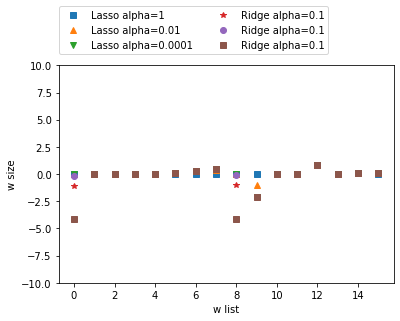

In [ ]:
## 릿지와 라쏘에 따른, alpha 값에 따른 회귀계수 관찰

# 릿지 회귀
ridge = Ridge().fit(X_train, Y_train)
ridge_10 = Ridge(alpha=10).fit(X_train, Y_train)
ridge_01 = Ridge(alpha=0.1).fit(X_train, Y_train)

# 라쏘 회귀
lasso = Lasso().fit(X_train, Y_train)
lasso_001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, Y_train)
lasso_00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, Y_train)

plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso_001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso_00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge.coef_, '*', label="Ridge alpha=1")
plt.plot(ridge_10.coef_, 'o', label="Ridge alpha=10")
plt.plot(ridge_01.coef_, 's', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))

plt.xlabel("w list")
plt.ylabel("w size")

plt.ylim(-10, 10)

plt.show()

In [ ]:
#출력값을 통해 반응 변수로 들어갈 수 있는 16개의 변수가 모두 사용된 것을 확인할 수 있다. 따라서 릿지 회귀를 사용할 경우 alpha 값에 따라 성능이 크게 변하지 않는 것을 확인할 수 있다.

ridge = Ridge().fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge.score(X_test, Y_test)))
print("사용한 특성의 수 : {}".format(np.sum(ridge.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge.n_iter_))



ridge_10 = Ridge(alpha=10).fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge_10.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge_10.score(X_test, Y_test)))
print("사용한 특성의 수 : {}".format(np.sum(ridge_10.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge_10.n_iter_))



ridge_01 = Ridge(alpha=0.1).fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(ridge_01.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(ridge_01.score(X_test, Y_test)))
print("사용한 특성의 수 : {}".format(np.sum(ridge_01.coef_ != 0)))
print("사용한 max_iter : {}".format(ridge_01.n_iter_))


훈련 세트의 정확도 : 0.99
테스트 세트의 정확도 : 1.00
사용한 특성의 수 : 16
사용한 max_iter : None
훈련 세트의 정확도 : 0.99
테스트 세트의 정확도 : 1.00
사용한 특성의 수 : 16
사용한 max_iter : None
훈련 세트의 정확도 : 0.99
테스트 세트의 정확도 : 1.00
사용한 특성의 수 : 16
사용한 max_iter : None


In [ ]:
# 출력값을 통해 반응 변수로 들어갈 수 있는 16개의 변수가 alpha 값에 따라 사용이 되거나 되지 않는 것을 확인할 수 있다.

lasso = Lasso().fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso.score(X_test, Y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso.n_iter_))



lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso001.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso001.score(X_test, Y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso001.n_iter_))


lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, Y_train)
print("훈련 세트의 정확도 : {:.2f}".format(lasso00001.score(X_train, Y_train)))
print("테스트 세트의 정확도 : {:.2f}".format(lasso00001.score(X_test, Y_test)))
print("사용한 특성의 수 : {}".format(np.sum(lasso00001.coef_ != 0)))
print("사용한 max_iter : {}".format(lasso00001.n_iter_))



훈련 세트의 정확도 : 0.99
테스트 세트의 정확도 : 1.00
사용한 특성의 수 : 10
사용한 max_iter : 593
훈련 세트의 정확도 : 0.99
테스트 세트의 정확도 : 1.00
사용한 특성의 수 : 16
사용한 max_iter : 1635
훈련 세트의 정확도 : 0.99
테스트 세트의 정확도 : 1.00
사용한 특성의 수 : 15
사용한 max_iter : 4754


#슬라이딩 윈도우 기법 이용해 회귀 진행

In [ ]:
import numpy as np
import copy as cp
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
class WindowSlider(object):
    def __init__(self, w):

        """
        w : window size(윈도우의 크기 -> 이 데이터에서는 일수를 뜻함)
        r : response size - w에 따른 예측치로 가기 위해 건너뛰어야 하는 값의 개수
        l : 최대 길이
        p : 최종 예측값
        o: offset between last reading and temperature
        """
        self.w = w
        self.o = 0
        self.r = 1
        self.l = 0
        self.p = 0
        self.names = []

    def re_init(self, arr):
        """
        Helper function to initializate to 0 a vector
        """
        arr = np.cumsum(arr)
        return arr - arr[0]

    def collect_windows(self, X, widow_size, offset = float(0), previous_y = False):
        """
        X: input matrix
        Returns : different mappings window-output
        """
        cols = len(list(X))-1
        N = len(X)

        self.o = offset
        window_size = self.w
        self.l = N - (self.w + self.r) + 1
        if not previous_y:
            self.p = cols * self.w
        if previous_y:
            self.p = (cols +1) * self.w

        # Create the names of the variables in the window
        # Check first if we need to create that for the response itself
        if previous_y:
            x = cp.deepcopy(X)
        if not previous_y:
            x = X.drop(X.columns[-1], axis=1)

        for j , col in enumerate(list(x)):
            for i in range(self.w):
                name = col + ("(%d)" % (i+1))
                self.names.append(name)

        # 예측하고 싶은 delta time
        for k in range(self.r):
            name = "∆t" + ("(%d)" % (self.w + k +1))
            self.names.append(name)

        self.names.append("Y")

        df = pd.DataFrame(np.zeros(shape = (self.l, (self.p + self.r +1))),
                         columns = self.names)

        # Populate by rows in the new dataframe
        for i in range(self.l):
            slices = np.array([])

            # Flatten the lags of predictors
            for p in range(x.shape[1]):
                line = X.values[i:self.w+i,p]

                # delta time에 대해 모든 윈도우에서 초기화
                if p == 0:
                    line = self.re_init(line)

                # Concatenate the lines in one slice
                slices = np.concatenate((slices,line))

            # Incorporate the timestamps where we want to predict
            line = np.array([self.re_init(X.values[i:i+self.w +self.r,0])[-1]])
            y = np.array(X.values[self.w + i + self.r -1, -1]).reshape(1,)
            slices = np.concatenate((slices,line,y))

            # Incorporate the slice to the cake (df)
            df.iloc[i,:] = slices

        return df

In [ ]:
#윈도우 수를 5개로 조정

w = 5

train_constructor = WindowSlider(w)
train_windows = train_constructor.collect_windows(train.iloc[:,1:], w,
                                                 previous_y = False)

test_constructor = WindowSlider(w)
test_windows = test_constructor.collect_windows(test.iloc[:,1:], w,
                                                 previous_y = False)
train_constructor_y_inc = WindowSlider(w)
train_windows_y_inc = train_constructor_y_inc.collect_windows(train.iloc[:, 1:], w,  previous_y = True)

test_constructor_y_inc = WindowSlider(w)
test_windows_y_inc = test_constructor_y_inc.collect_windows(test.iloc[:, 1:],w, previous_y = True)

train_windows.head(3)
# print(train_windows.shape) -> (61202, 77)로 출력

(61202, 77)


In [ ]:
# 현재값을 예측값으로 했을 때
bl_trainset = cp.deepcopy(train)
bl_testset = cp.deepcopy(test)

bl_train_y = pd.DataFrame(bl_trainset['wl_1018662'])
bl_train_y_pred = bl_train_y.shift(periods = 1)

bl_y = pd.DataFrame(bl_testset['wl_1018662'])
bl_y_pred = bl_y.shift(periods = 1)

summ = 0
y_mean = 0
for i in bl_y.index:
    summ += bl_y['wl_1018662'][i]
    y_mean = summ / (len(bl_y))

bl_error = bl_y_pred - y_mean
bl_residuals = bl_y_pred - bl_y
bl_rmse = np.sqrt(np.sum(np.power(bl_residuals,2)) / len(bl_residuals))
bl_r_squared = 1 - ((np.sum(np.power(bl_residuals, 2))) / (np.sum(np.power(bl_error, 2))))

print("RMSE = %.2f" % bl_rmse)
print("R^2 = {}".format(bl_r_squared['wl_1018662']))

RMSE = 5.86
R^2 = 0.9957018993071343


In [ ]:
#window 수를 5개로 하고 회귀 분석 진행
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_windows.iloc[:,:-1], train_windows.iloc[:,-1])

lr_y = test_windows['Y'].values
lr_y_fit = lr_model.predict(train_windows.iloc[:,:-1])
lr_y_pred = lr_model.predict(test_windows.iloc[:,:-1])

summ = 0

for i in range(len(lr_y)):
    summ += lr_y[i]
    y_mean = summ / (len(lr_y))

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2))/ len(lr_residuals))
print("RMSE = %.2f" %lr_rmse)


RMSE = 0.36


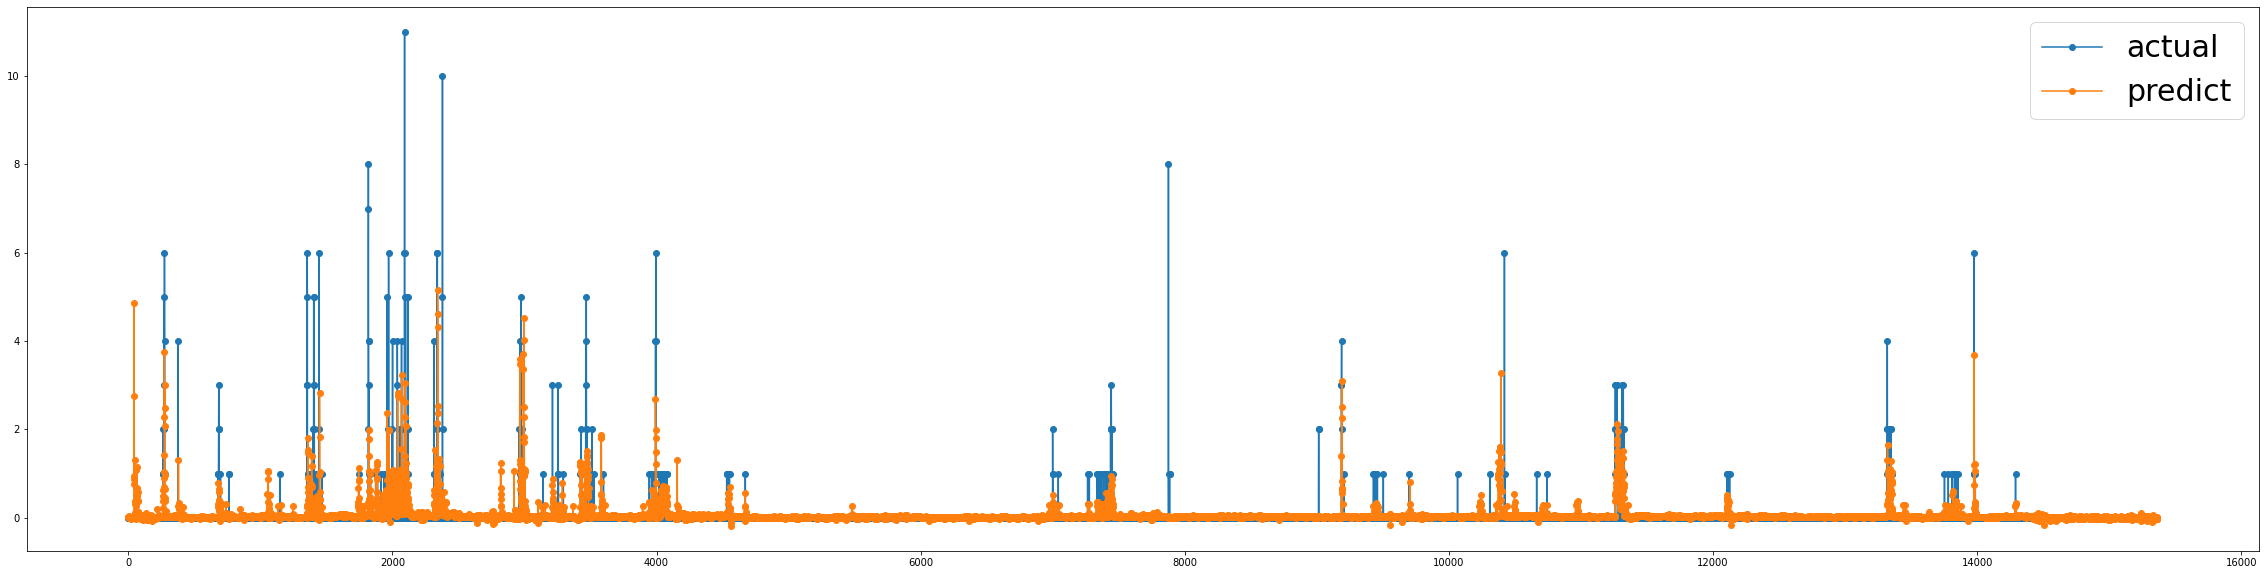

In [ ]:
fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(40,10)

ax1.plot(lr_y, marker = "o" , label = "actual")
ax1.plot(lr_y_pred, marker = "o" , label = "predict")
ax1.legend(prop={'size':30})

In [ ]:
#윈도우 수를 10개로 조정

w = 10

train_constructor = WindowSlider(w)
train_windows = train_constructor.collect_windows(train.iloc[:,1:], w,
                                                 previous_y = False)

test_constructor = WindowSlider(w)
test_windows = test_constructor.collect_windows(test.iloc[:,1:], w,
                                                 previous_y = False)
train_constructor_y_inc = WindowSlider(w)
train_windows_y_inc = train_constructor_y_inc.collect_windows(train.iloc[:, 1:], w, previous_y = True)

test_constructor_y_inc = WindowSlider(w)
test_windows_y_inc = test_constructor_y_inc.collect_windows(test.iloc[:, 1:],w, previous_y = True)

train_windows.head(3)

,swl(1),swl(2),swl(3),swl(4),swl(5),swl(6),swl(7),swl(8),swl(9),swl(10),...,rf_10184110(3),rf_10184110(4),rf_10184110(5),rf_10184110(6),rf_10184110(7),rf_10184110(8),rf_10184110(9),rf_10184110(10),∆t(11),Y
0,0.0,24.794,49.583,74.372,99.161,123.950,148.740,173.529,198.318,223.107,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.896,0.0
1,0.0,24.789,49.578,74.367,99.156,123.946,148.735,173.524,198.313,223.102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.891,0.0
2,0.0,24.789,49.578,74.367,99.157,123.946,148.735,173.524,198.313,223.102,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,247.892,0.0


In [ ]:
#window 수를 10개로 한 후에 회귀 분석 진행
lr_model = LinearRegression()
lr_model.fit(train_windows.iloc[:,:-1], train_windows.iloc[:,-1])

lr_y = test_windows['Y'].values
lr_y_fit = lr_model.predict(train_windows.iloc[:,:-1])
lr_y_pred = lr_model.predict(test_windows.iloc[:,:-1])

lr_residuals = lr_y_pred - lr_y
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2))/ len(lr_residuals))
print("RMSE = %.2f" %lr_rmse)

RMSE = 0.36


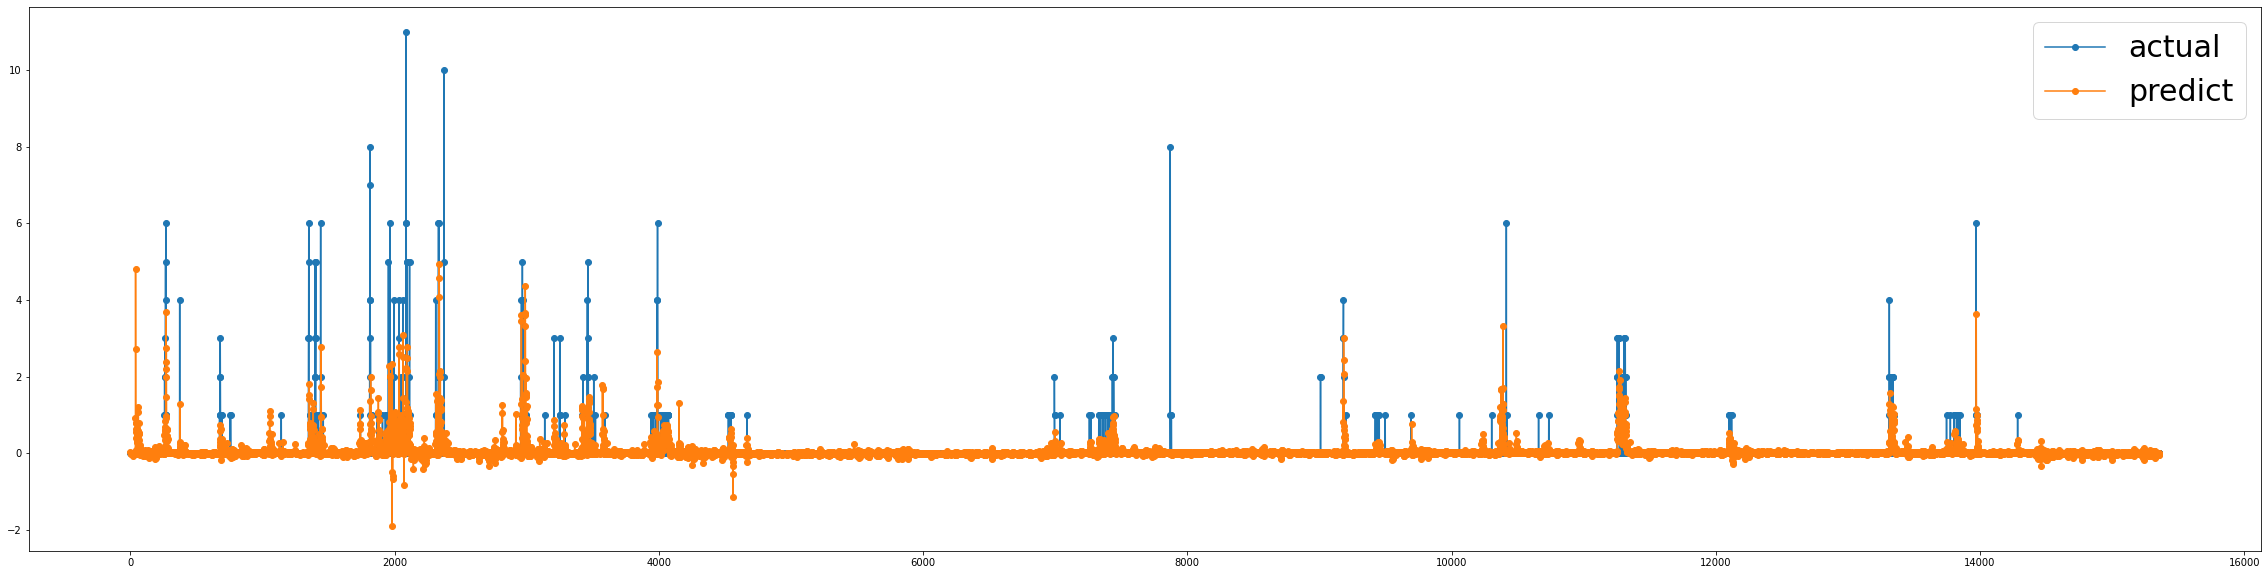

In [ ]:
fig, ax1  = plt.subplots(nrows=1)
fig.set_size_inches(40,10)

ax1.plot(lr_y, marker = "o" , label = "actual")
ax1.plot(lr_y_pred, marker = "o" , label = "predict")
ax1.legend(prop={'size':30})

# 분석 방법에 따른 RMSE 비교

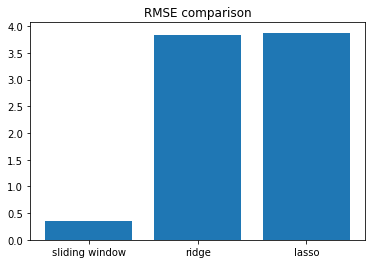

In [ ]:
import matplotlib.pyplot as plt
y = [lr_rmse, RMSE_Ridge, RMSE_Lasso]
x = np.arange(len(y))
xlabel = ['sliding window', 'ridge', 'lasso']
plt.title("RMSE comparison")
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.show()